In [2]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sea
import pandas as pd
import datetime
import plotly.express as px          # dataset

# Relational Plots -> line , scatter , facet
to see the statistical relation between 2 or more variables , Bivariate Analysis

### Scatter Plot

In [3]:
tip = sea.load_dataset('tips')
tip.head(1)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2


<Axes: xlabel='total_bill', ylabel='tip'>

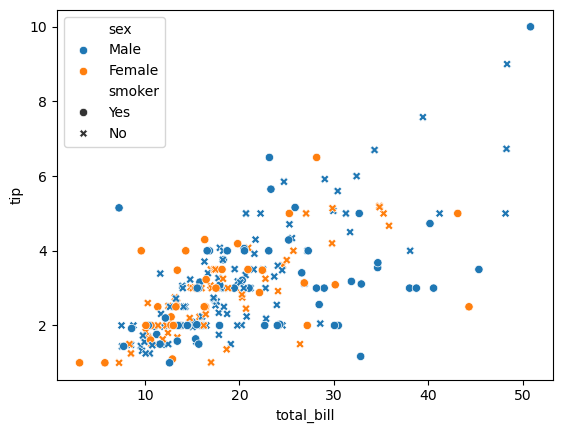

In [4]:
sea.scatterplot( data=tip , x='total_bill' , y='tip' , hue='sex' , style ='smoker' )

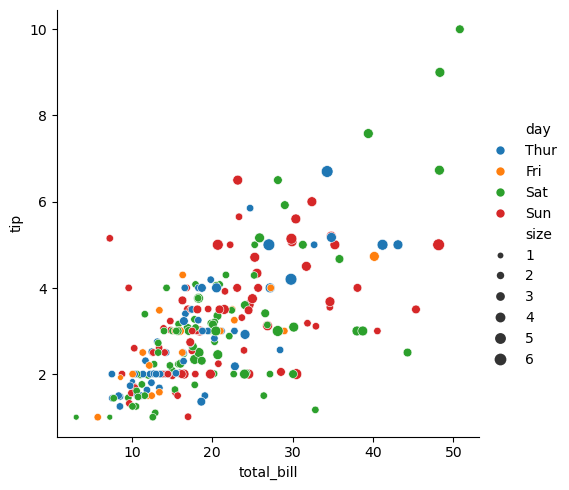

In [5]:
sea.relplot( data=tip , x='total_bill' , y='tip' , kind = 'scatter' , hue='day', size='size')

### Facet Plot -> multiple graphs on a categorial variable -> figure level function -> work with relplot -> it will not work with axis level .

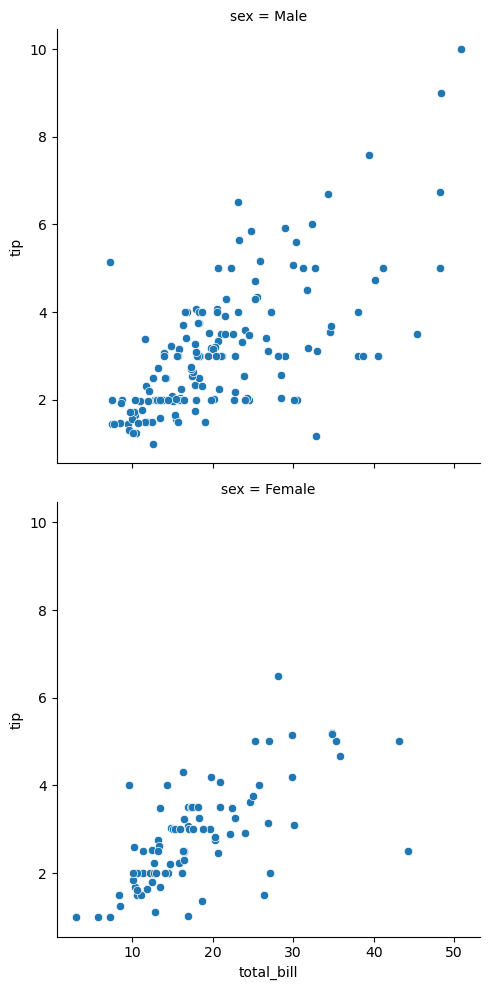

In [6]:
sea.relplot( data=tip , x='total_bill' , y='tip' , kind = 'scatter' , row='sex')         # hue -> row

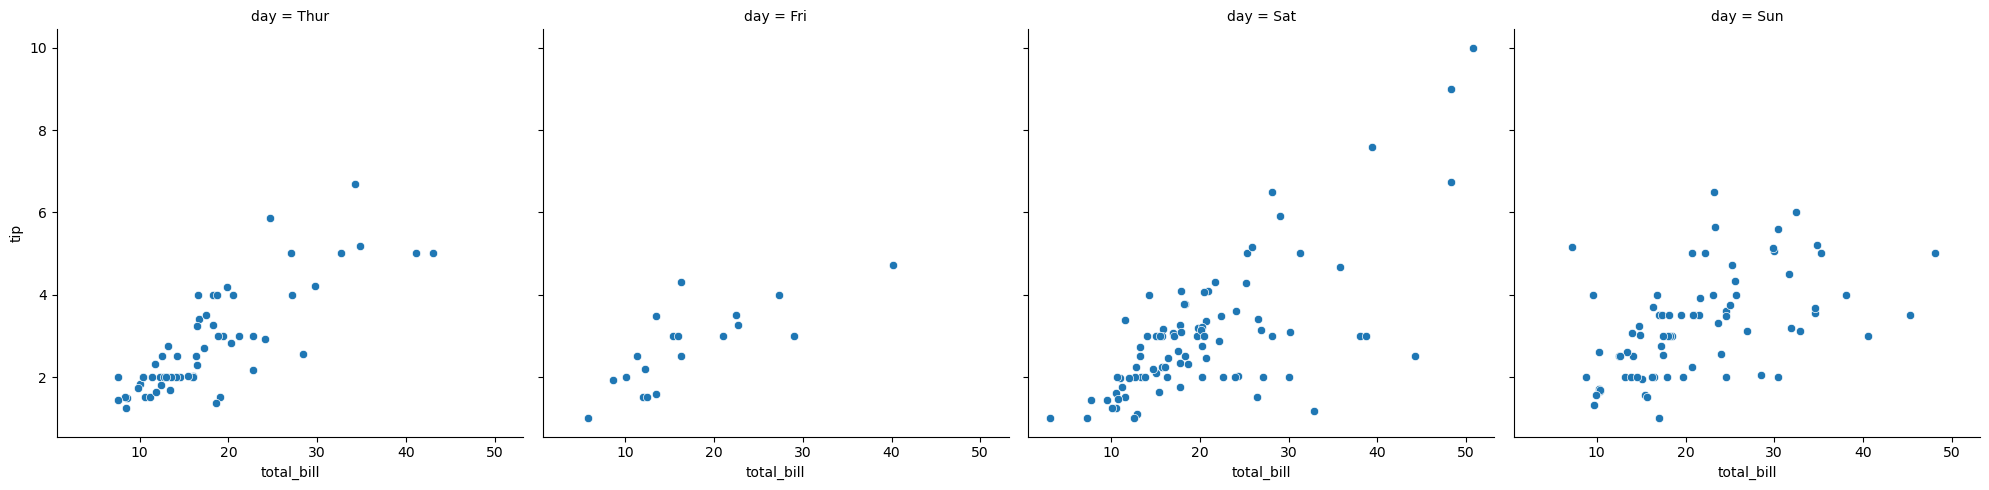

In [7]:
sea.relplot( data=tip , x='total_bill' , y='tip' , kind = 'scatter' , col='day')         # hue -> col

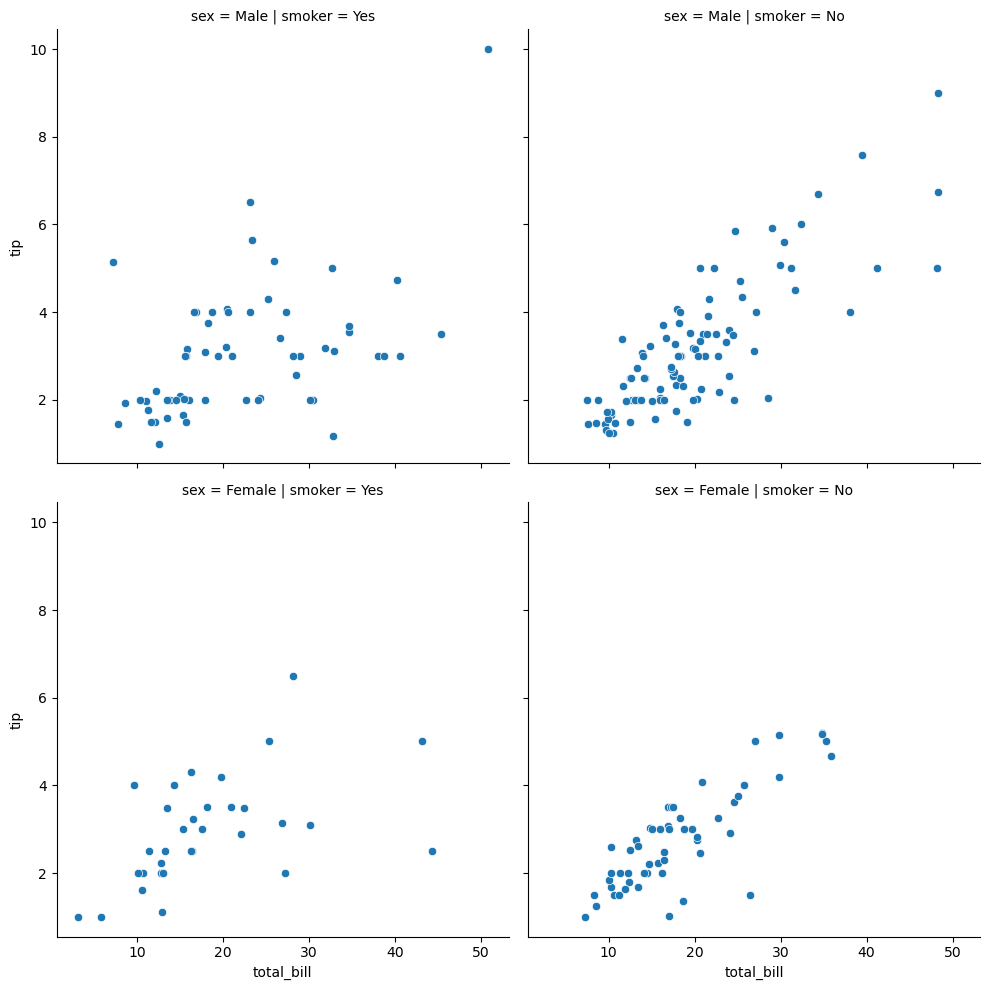

In [8]:
sea.relplot( data=tip , x='total_bill' , y='tip' , kind = 'scatter' , row='sex' , col='smoker')  

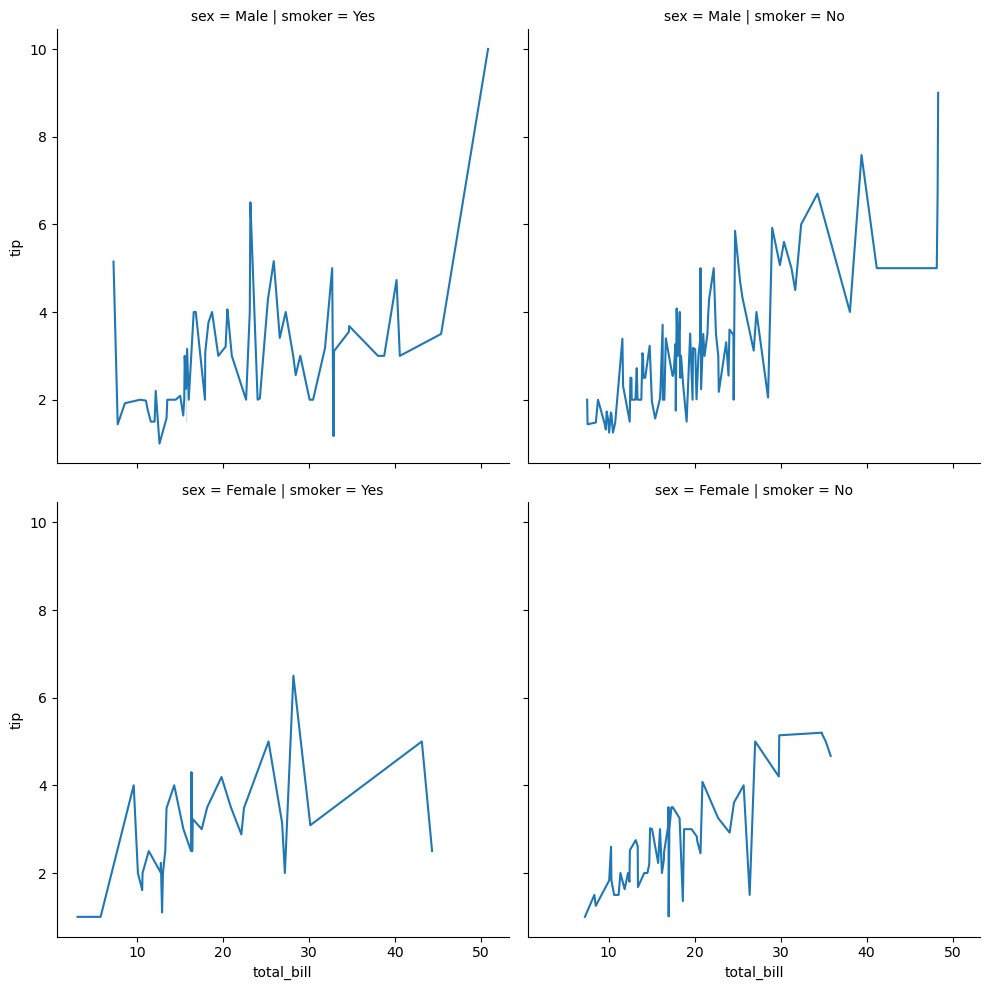

In [9]:
sea.relplot( data=tip , x='total_bill' , y='tip' , kind = 'line' , row='sex' , col='smoker')  

In [10]:
gap.head(1)

NameError: name 'gap' is not defined

In [ ]:
sea.relplot(data=gap, x='lifeExp', y='gdpPercap', kind='scatter', col='year')

In [ ]:
sea.relplot(data=gap, x='lifeExp', y='gdpPercap', kind='scatter', col='year' , col_wrap=5)          # col_wrap

### Line Plot

In [ ]:
gap = px.data.gapminder()
gap.head(1)

In [ ]:
mask = gap['country']=='India'
data = gap[mask]
data

In [ ]:
sea.lineplot( data= data, x= 'year' , y='lifeExp' )

In [ ]:
sea.relplot( data= data, x= 'year' , y='lifeExp' , kind='line')

In [ ]:
mask = gap['country'].isin(['India','China', 'Germany'])
data = gap[mask]
sea.relplot( data= data, x= 'year' , y='lifeExp' , kind='line' , hue='country')

In [ ]:
mask = gap['country'].isin(['India','China', 'Brazil', 'Germany'])
data = gap[mask]
sea.relplot( data= data, x= 'year' , y='lifeExp' , kind='line' , hue='country' , style='continent' , size='continent')

# Distribution Plots -> histplot , kdeplot , rugplot
used for univariate analysis , used to find out the distribution , Range of the observation , Central Tendency
is the data bimodal? , Are there outliers?

### Histograms 

In [ ]:
sea.histplot( data = tip , x = 'total_bill')      # x can be categorical or numerical 

In [ ]:
sea.displot( data = tip , x = 'total_bill' , kind='hist')

In [ ]:
sea.displot( data = tip , x = 'total_bill' , kind='hist' , bins=2)

In [ ]:
sea.displot( data = tip , x = 'day' , kind='hist' , element='step' )        # count plot

In [ ]:
sea.displot( data = tip , x = 'day' , kind='hist' , hue='sex')        # count plot

In [ ]:
sea.displot( data = tip , x = 'day' , kind='hist' , hue='sex' , element='step')       

In [ ]:
titanic = sea.load_dataset('titanic')
titanic.head(1)

In [ ]:
sea.displot(data=titanic, x='age', kind='hist',element='step',hue='sex')

In [ ]:
# faceting using col and row -> not work on histplot function
sea.displot(data=tip, x='tip', kind='hist',col='sex',element='step')

### KDE Plot -> Rather than using discrete bins, a KDE plot smooths the observations with a Gaussian kernel, producing a continuous density estimate

In [ ]:
sea.kdeplot(data=tip , x='total_bill')       # density -> probablity of occurence

In [ ]:
sea.displot(data=tip ,x='total_bill',kind='kde')     # density -> probablity of occurence

In [ ]:
sea.displot(data=tip , x='total_bill' , kind='kde' , hue='sex' , fill=True )     # hue -> lines and fill -> for filling colors

### Rug Plot -> Plot marginal distributions by drawing ticks along the x and y axes.-> This function is intended to complement other plots by showing the location of individual observations in an unobtrusive way.

In [ ]:
sea.rugplot(data=tip ,x='total_bill')

In [ ]:
# Bivariate histogram -> A bivariate histogram bins the data within rectangles that tile the plot 
# and then shows the count of observations within each rectangle with the fill color

sea.histplot(data=tip , x='total_bill', y='tip')
sea.displot(data=tip , x='total_bill', y='tip', kind='hist')

In [ ]:
# Bivariate Kdeplot -> a bivariate KDE plot smoothes the (x, y) observations with a 2D Gaussian
sea.kdeplot(data=tip, x='total_bill', y='tip')

# Matrix Plot -> heat , cluster

### Heatmap

In [ ]:
gap.head(1)

In [ ]:
data = gap.pivot( index='country' , columns='year' , values= 'lifeExp' )
data

In [ ]:
sea.heatmap( data=data)  # no fig level funcation 

In [ ]:
plt.figure(figsize=(10,3))   # for figure level -> add attribute ( height= num , aspect = num ) <- aspect = height * num 
sea.heatmap( data=data) 

In [ ]:
mask = gap['continent']=='Europe'
new_data = gap[mask]
model = new_data.pivot( index = 'country' , columns= 'year' , values='lifeExp')
sea.heatmap( data=model )      # for european countries

In [ ]:
mask = gap['continent']=='Europe'
new_data = gap[mask]
model = new_data.pivot( index = 'country' , columns= 'year' , values='lifeExp')
plt.figure(figsize=(10,10))
sea.heatmap( data=model , annot=True ,linewidth=0.5, cmap='summer')     # annot <- for numbers 

### Cluster Map -> Plot a matrix dataset as a hierarchically-clustered heatmap , This function requires scipy to be available

In [ ]:
iris = px.data.iris()
iris.head(1)

In [ ]:
sea.clustermap(iris.iloc[:,[0,1,2,3]])

# Categorical Plots

### Strip plot -> plot the points and adds on noise & used on large dataset

In [11]:
tip.head(1)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2


<Axes: xlabel='day', ylabel='total_bill'>

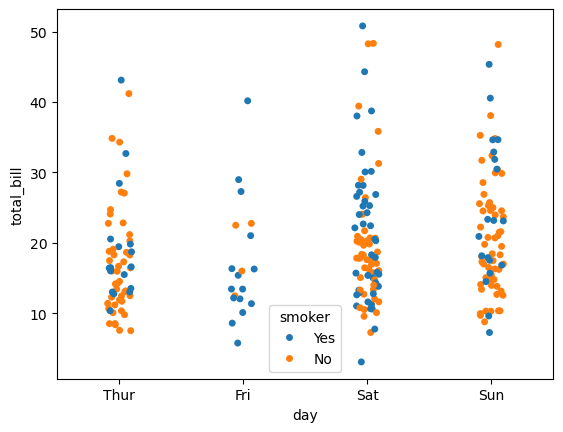

In [13]:
sea.stripplot( data=tip , x = 'day' , y='total_bill' , hue='day')      # axis level

<Axes: xlabel='day', ylabel='total_bill'>

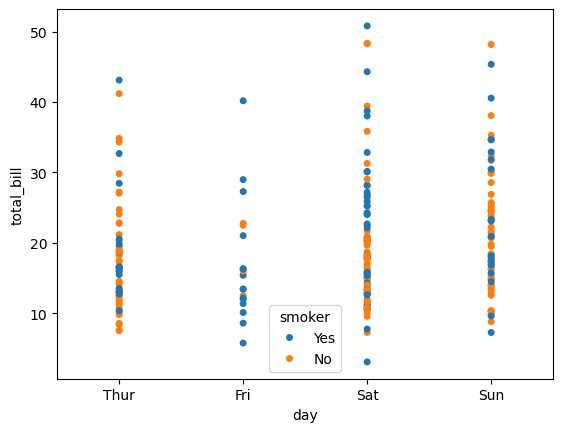

In [17]:
sea.stripplot( data=tip , x = 'day' , y='total_bill' , hue='day' , jitter=False )      

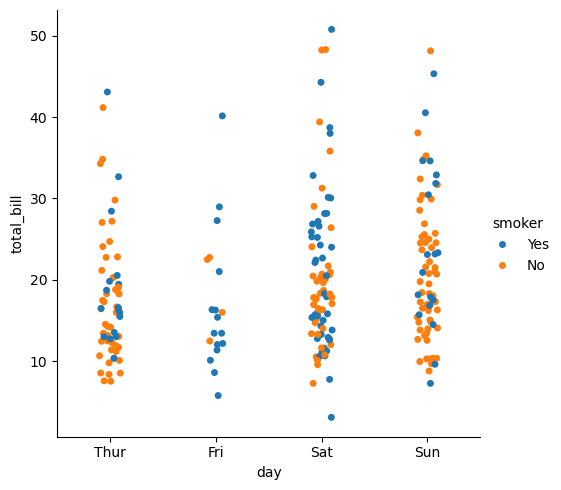

In [18]:
sea.catplot( data=tip , x = 'day' , y='total_bill' , hue='day'' , kind ='strip' )   # figure level

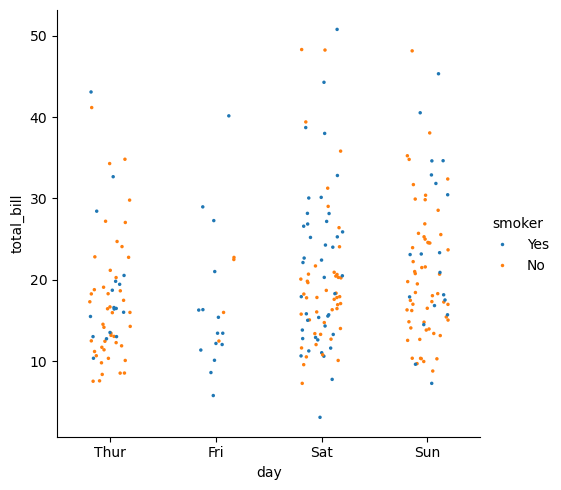

In [28]:
sea.catplot( data=tip , x = 'day' , y='total_bill' , hue='smoker' , marker ='.', kind ='strip' , jitter= 0.2 ) 

### Swarm Plot -> uses some algo so that we get some idea of the distribution & used on small dataset

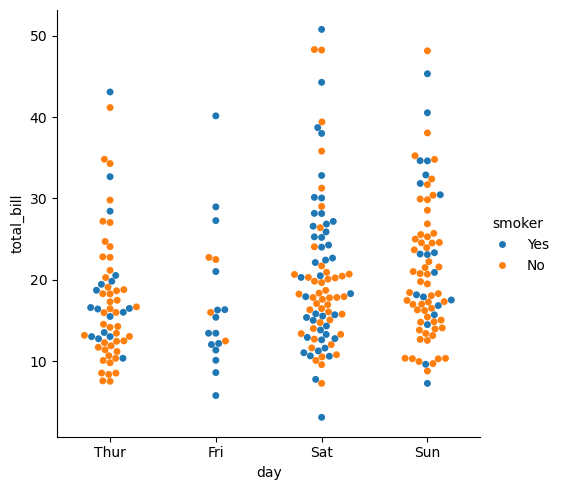

In [32]:
sea.catplot( data=tip , x = 'day' , y='total_bill' , hue='smoker' ,  kind ='swarm'  ) 

<Axes: xlabel='day', ylabel='total_bill'>

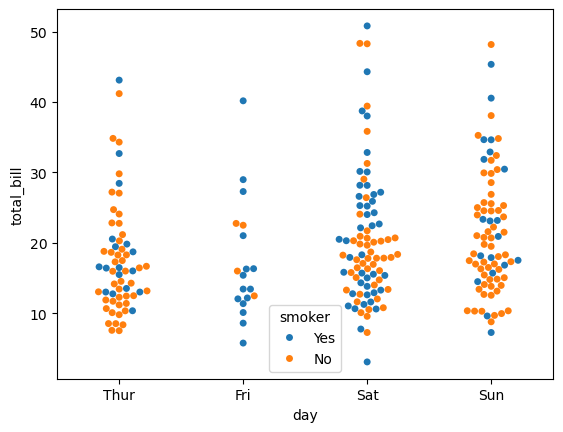

In [34]:
sea.swarmplot( data=tip , x = 'day' , y='total_bill' , hue='smoker' ) 

### Box Plot -> “minimum”, first quartile [Q1], median, third quartile [Q3] and “maximum”